# Introduction 


In multiple regression the data set looks like this:

$$ X, y = \{(x_{11}, x_{12}, ... , x_{1p}, y_1), ... .... ..., (x_{m1}, x_{m2}, ... , x_{mp}, y_m)\} $$

Hence, X is $ m \times p $ matrix. So, line of best fit (it is infact hyper plane of best fit) looks like this: 

$$ y = \theta_0 + \theta_1 X_1 + \theta_2 X_2 + .... .. + \theta_p X_p $$


# Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Importing data in pandas 

In [2]:
df = pd.read_csv('Data/ex1data2.txt', header = None, 
                 names = ['size_of_house', 'number_of_bed_rooms', 'price'])

In [3]:
df.sample(5)

,size_of_house,number_of_bed_rooms,price
33,3137,3,579900
0,2104,3,399900
15,2300,4,449900
28,2200,3,475000
1,1600,3,329900


# Visualization tools for multiple feature data

The first figure is pair plot. It plots the scatter matrix for each variable with all the other variables (off diagonal). The diagonal plots are the probability distribution function of each of the variable.

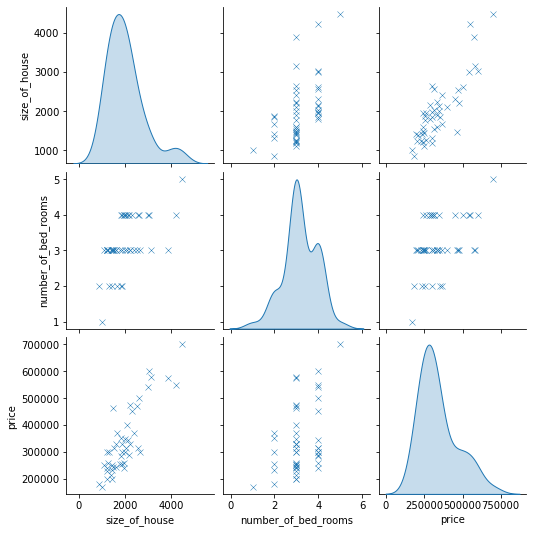

In [4]:
import seaborn as sns

import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

sns.pairplot(df, diag_kind = 'kde', markers = 'x')
plt.show()

This one is called heatmap of the correlations. The intensity of color indicates the degree of correlation among the variables. The values inside the box are the values of the correlations. 

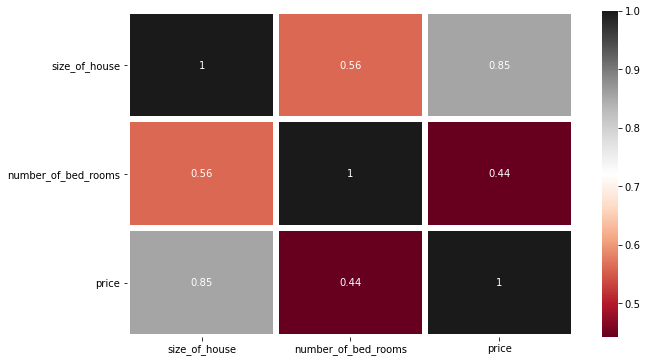

In [5]:
plt.subplots(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True, linewidths = 5, cmap = 'RdGy')
plt.show()

# Feature Normalization 

Basically we define here new X such that 

$$ X_{new} = \frac{X - \bar{X}}{\sigma_X} $$

Where, $\bar{X}$ is mean and $\sigma_X$ is the standard deviation of the data.

In [6]:
X = df.drop(['price'], axis = 1)
y = df['price']
m = len(y)

X = (X - np.mean(X))/np.std(X)

X.insert(0, 'Bias', 1)

theta = np.zeros(3)

X.head()

,Bias,size_of_house,number_of_bed_rooms
0,1,0.131415,-0.226093
1,1,-0.509641,-0.226093
2,1,0.507909,-0.226093
3,1,-0.743677,-1.554392
4,1,1.271071,1.102205


In [7]:
print(np.shape(X))
print(np.shape(y))

(47, 3)
(47,)


# Cost function 

The hyperplane of best fit for y given X takes the following form:

$$ y = \theta_0 + \theta_1 X_1 + \theta_2 X_2 + ... ... + \theta_p X_p = \theta^T X$$
Where, for unknown y, it is usually called a hypothesis.

$$ y_{pred} = h (X, \theta) $$
For the training set the difference of the prediction by the hypothesis h and y is called the residue error. The sum of square of residue of each data point in training set is called cost function. Which loos like this:

$$ J(X, y, \theta) = \frac{1}{2m} \sum_{i = 1}^m \left(h(X^{(i)}, \theta) - y^{(i)}\right)^2  $$

In [8]:
def hypothesis(theta, X):
    return np.dot(X, theta)


def cost_function(theta, X, y):
    temp = hypothesis(theta, X) - y
    return 1/(2 * m) * np.dot(temp, temp)

In [9]:
hypothesis(theta, X)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
cost_function(theta, X, y)

65591548106.45744

# Gradient descent 

In calculus, gradient is the direction of the maximum increase of a function. So, negative of the gradient is direction of maximum decrease of the function. By gradient we mean the following two functions:

$$ \frac{\partial J}{\partial \theta_0} \quad ... ... \quad \frac{\partial J}{\partial \theta_p}   $$
Hence the following recursion give eventually leads to the local minima (for well defined cost function there is only global minima):

$$ \theta_j = \theta_j - \alpha \frac{\partial J}{\partial \theta_j} $$


If we substitute the expression of the cost function in the above relations we arrive at the following pair of expressions.

$$ \theta_j = \theta_j - \frac{\alpha}{m} \sum_{i = 1}^m \left(h(X^{(i)}, \theta) - y^{(i)}\right) X^{(i)}_j $$


In [11]:
def gradient(theta, X, y):
    temp = hypothesis(theta, X) - y
    return 1/m * np.dot(temp, X)

In [12]:
gradient(theta, X, y)

array([-340412.65957447, -105764.13349282,  -54708.82175587])

In [13]:
alpha = 0.1
iterations = 30

In [14]:
def gradient_descent(theta, X, y, alpha, iterations):
    
    cost_list = list()
        
    for _ in range(iterations):
        theta = theta - alpha * gradient(theta, X, y)
        
        cost = cost_function(theta, X, y)
        cost_list.append(cost)
        
    return theta, cost_list

# Convergence of gradient descent 

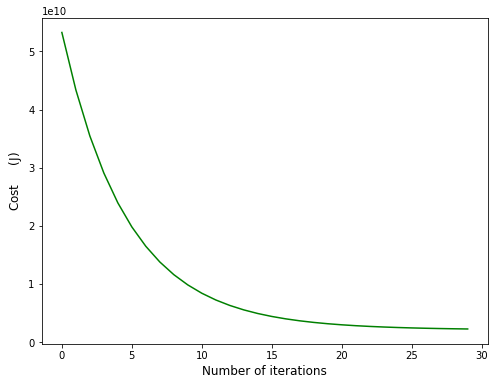

In [15]:
plt.figure(figsize = (8, 6))

plt.plot(gradient_descent(theta, X, y, alpha, iterations)[1], 'g')
plt.xlabel('Number of iterations', size = 12)
plt.ylabel('Cost $\quad$ (J)', size = 12)
plt.show()

In [16]:
gradient_descent(theta, X, y, alpha, iterations)[0]

array([325982.17264356,  94091.45032403,   8143.23003983])

These are the values of $\theta_0, \quad \theta_1, \quad \theta_2$ respectively. 

# Using normal equation 


Here we calculate the same regression coefficient using the normal equation: 

$$ \theta = (X^T X)^{-1} X^T y$$

But we see that the values are not quite matching. Especially $\theta_2$ is hugely different. The reason is in the gradient descent algorithm above the convergence is not setteled yet. So, in the final step I change the $\alpha$ and the number of iteration and there is good agreement. 

In [17]:

X_mat = X.values
X_T = X_mat.transpose()

XT_X_inv = np.linalg.inv(np.matmul(X_T, X_mat))
XT_y = np.matmul(X_T, y)

np.matmul(XT_X_inv, XT_y)

array([340412.65957447, 109447.79646964,  -6578.35485416])

In [18]:
gradient_descent(theta, X, y, 0.6, 50)[0]

array([340412.65957447, 109447.78368066,  -6578.34206518])

# Playing with $\alpha $

By changing $\alpha$ I can see that with larger value of them around 0.6, the convergence is better than the samller values. 

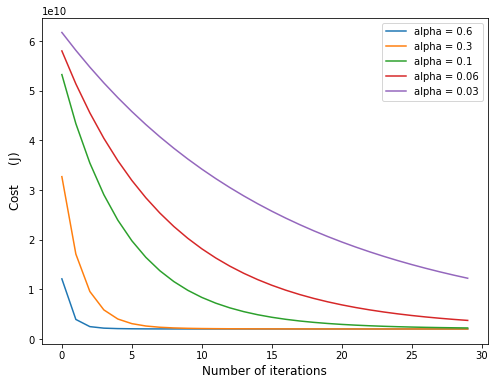

In [19]:
alpha_list = [0.6, 0.3, 0.1, 0.06, 0.03]

plt.figure(figsize = (8, 6))
for alpha in alpha_list:
    conv = gradient_descent(theta, X, y, alpha, iterations)[1]
    plt.plot(conv, label = 'alpha = ' + str(alpha))

plt.legend()
plt.xlabel('Number of iterations', size = 12)
plt.ylabel('Cost $\quad$ (J)', size = 12)
plt.show()

# Scikit learn 

The algorithm written above might be slow to implement on large data set on real life. In that case we can use advanced optimization method using scikit learn or statsmodel. This and next sections are about scikit learn. And last section is about the statsmodel package.

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = df.drop(['price'], axis = 1)
y = df['price']
model.fit(X, y)

print('Theta_0 : \t \t' , model.intercept_)
print('Theta_1, Theta_2 : \t', model.coef_)

Theta_0 : 	 	 89597.90954279748
Theta_1, Theta_2 : 	 [  139.21067402 -8738.01911233]


Mean squared error and R-squared calculated here gives some indication about how well the data is fitting on the training set. It might not necessarily indicate its accuracy in test set. If the model fits exceptionally well on training set and performs worst on test set, then there might be overfitting. We we should avoide in any cost.

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = model.predict(X)

print('Mean squared error : \t', mean_squared_error(y, y_pred))
print('R squared : \t \t', r2_score(y, y_pred))

Mean squared error : 	 4086560101.205658
R squared : 	 	 0.7329450180289141


# Feature renormalization affect the coefficients 

Notice that the above prediction of $\theta$'s by scikit learn is not same as the one we did by previous method. This is the effect of normalization. If we do normalize here too we retain the older result.

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = df.drop(['price'], axis = 1)
y = df['price']

X = (X - np.mean(X))/np.std(X)

model.fit(X, y)

print('Theta_0 : \t \t' , model.intercept_)
print('Theta_1, Theta_2 : \t', model.coef_)

Theta_0 : 	 	 340412.6595744681
Theta_1, Theta_2 : 	 [109447.79646964  -6578.35485416]


We can do the inverse transformation of the coefficients to get the coefficients without normalization transformation. 

$$ \theta = \bar{X} + \sigma \theta_X $$

The value of $R-squared$ has not changed though. And y also remains the same by feature normalization. 

# Statsmodels 

Statsmodes' functionality can be useful for staistical modeling. More importantly it gives the standard error and p-value of each regression coefficient. Which can be very helpful in feature selection etc.

Also notice that the coef: (intercept, population) are very close to $\theta_0 \quad and \quad \theta_1 $ predicted above. Also R-squared is the same, indicating the consistencies of our overall calculation.

In [23]:
import statsmodels.formula.api as smf

results = smf.ols('price ~ number_of_bed_rooms + size_of_house' , data = df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     60.38
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           2.43e-13
Time:                        19:13:36   Log-Likelihood:                -586.77
No. Observations:                  47   AIC:                             1180.
Df Residuals:                      44   BIC:                             1185.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             8.96e+04   4.18e+04      2.145      0.037    5421.208    1.74e+05
number_of_bed_rooms -8738.0191   1.55e+04     -0.566      0.575   -3.99e+04    2.24e+04
size_of_house         139.2107     14.795      9.409      0.000     109.393     169.028
==============================================================================
Omnibus:                        4.083   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                2.977
Skew:                           0.567   Prob(JB):                        0.226
Kurtosis:                       3.484   Cond. No.                     9.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""